In [52]:
import numpy as np
import scipy as sp
from matplotlib import pyplot as plt

from utilities import plot_class_pdf, show_boundary_2D, load_data, split_data, safeshape

# Theoretical part
Please remember to embed the answers of the theoretical part for the bonus within the report from this file.

You may either 
 * answer within this notebook using the markup cells, or
 * create a pdf file for your theoretical answers in another way and then manually merge it with the pdf report from this notebook.
 
 In both cases, you should submit a single pdf file containing both the answer of your theoretical part and the report of the practical part.

# Practical part

## Loading data_1
We first load the first dataset.

In [53]:
data_1 = load_data('bonus_1',2)

## Study the dataset

Try to get the intuition of the provided data, by visualising the density of the classes.

_Hint_: You might find useful the provided function ```plot_class_pdf```.

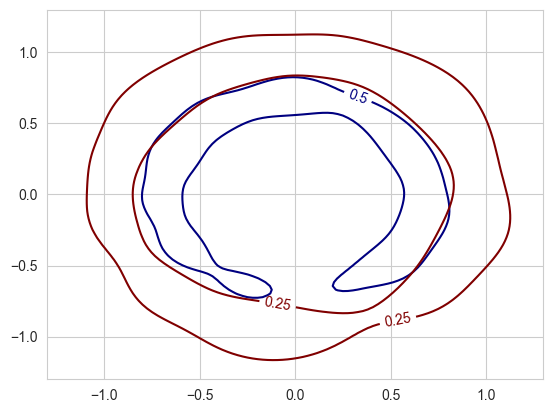

In [54]:
domain = [[-1.3,1.3]]*2
plot_class_pdf(domain,data_1,levels=1,bw_method=.25)

##### Answer
Yes we think that it is possible to classify the data with a linear classifier

## Learning with nonlinearities (```data_1```)
Using the knowledge you have acquired so far, but also any additional intuition of your own, perform the appropriate modifications on the data, that will allow a linear classifier to classify this dataset.

For this, you will use a transformation function that will preprocess your data accordingly. Your transformation function will have to be used for both training and classification, appropriately.

Using the provided data splitting, fit a logistic regression model on the training data.

Draw the decision oundary of your classifier. _Hint_: You might find useful the function ```show_boundary_2D```.

Report your accuracy on the testing data.

In [55]:
def acc(X,y, model):
    #Complete this function to compute the model accuracy.
    return model.score(X, y)

In [56]:
sdata_1 = split_data(data_1.X,data_1.y)

LR train score:  0.5188888888888888
LR test score:  0.57
LR (w/ enhanced features) train score:  0.8855555555555555
LR (w/ enhanced features) test score:  0.94


/Users/introvertuoso/PycharmProjects/eml2022/ExerciseSheet_02/problems/utilities.py:54: UserWarning: No contour levels were found within the data range.
  plt.contour(x1,x2,y,levels=levels,**kwargs)


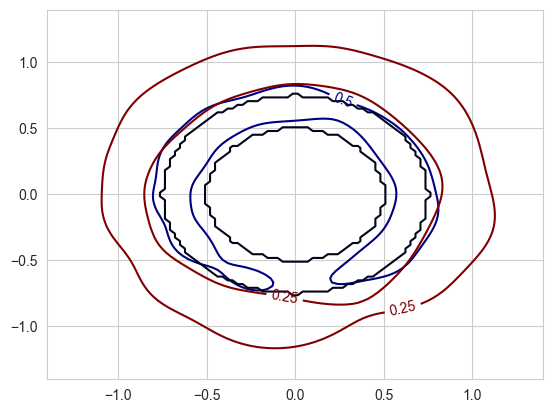

In [78]:
import sklearn as skl
import sklearn.linear_model

# Train your *logistic regression* here
# You may use the models from scikit-learn.
lr = skl.linear_model._logistic.LogisticRegression()
lr.fit(sdata_1.x_trn, sdata_1.y_trn)
print("LR train score: ", acc(sdata_1.x_trn, sdata_1.y_trn, lr))
print("LR test score: ", acc(sdata_1.x_tst, sdata_1.y_tst, lr))

# Fill the next function to accept a design matrix with 2 predicates, and return one with
# at most 2 additional predicates. Feel free to improvise, as long as you end up with
# at most 4 predicates in total.
# Then use this function appropriately to fit and predict.
def trn_1(X):
    # TODO: Modify this function (do not remove the assertion)
    X_out = np.array([np.append(i, i[0]**2 + i[1]**2 <= 0.75**2 and i[0]**2 + i[1]**2 >= 0.5**2) for i in X])
    assert ((X_out.shape[0]==X.shape[0]) and (X_out.shape[1]<=4)),f'You are only allowed to use at MOST 4 predictors, but it seems you are using {safeshape(X_out,1)}'
    return X_out

mdl = skl.linear_model._logistic.LogisticRegression()
mdl.fit(trn_1(sdata_1.x_trn), sdata_1.y_trn)

domain = [[-1.4,1.4]]*2
plot_class_pdf(domain,data_1,levels=1,bw_method=.25)
show_boundary_2D(domain, mdl.predict, featmap=lambda x:trn_1(x))
show_boundary_2D(domain, lr.predict)
# Compute and report the accuracy of your model

print("LR (w/ enhanced features) train score: ", acc(trn_1(sdata_1.x_trn), sdata_1.y_trn, mdl))
print("LR (w/ enhanced features) test score: ", acc(trn_1(sdata_1.x_tst), sdata_1.y_tst, mdl))

## Loading data_2

In [60]:
data_2 = load_data('bonus_2',2)

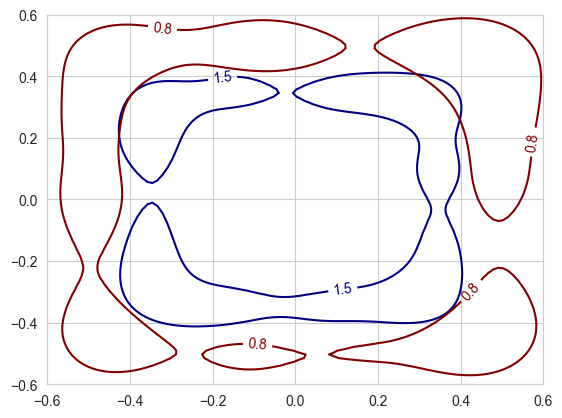

In [61]:
domain_2 = [[-.6,.6]]*2
plot_class_pdf(domain_2,data_2,levels=1,bw_method=.25)

## Study the dataset

Try to get the intuition of the provided data, by visualising the density of the classes.

_Hint_: You might find useful the provided function ```plot_class_pdf```.

## Learning with nonlinearities (```data_2```)
Using the knowledge you have acquired so far, but also any additional intuition of your own, perform the appropriate modifications on the new data and its peculiarities, which may have to deviate from the method you used for ```data_1```. Your goal is to find a transform that can replace the given predicates with a single one that allows a linear classifier to classify this dataset.

For this, you will again use a transformation function that will preprocess your data accordingly. Your transformation function will have to be used for both training and classification, appropriately.

Using the provided data splitting, fit a logistic regression model on the training data.

Draw the decision oundary of your classifier. _Hint_: You might find useful the function ```show_boundary_2D```.

Report your accuracy on the testing data.

## Classifying data_2
Again, use any method you prefer to classify the datset using the data_2 dataset.
Using the provided splitting, evaluate your classifier accuracy.
After training, plot the test dataset distribution and the decision boundary of your method.
You might find useful the function _show_boundary_2D_.

In [62]:
sdata_2 = split_data(data_2.X,data_2.y)

LR train score:  0.44666666666666666
LR test score:  0.48
LR (w/ enhanced features) train score:  0.9922222222222222
LR (w/ enhanced features) test score:  1.0


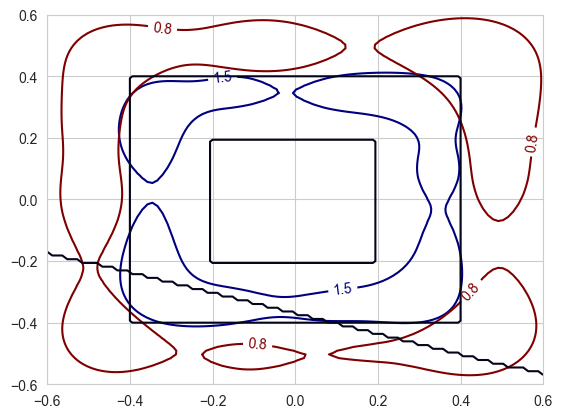

In [84]:
# Here, train your model
import sklearn as skl
import sklearn.linear_model

## Train your logistic regression here
# You may use the models from scikit-learn.
lr2 = skl.linear_model._logistic.LogisticRegression()
lr2.fit(sdata_2.x_trn, sdata_2.y_trn)
print("LR train score: ", acc(sdata_2.x_trn, sdata_2.y_trn, lr2))
print("LR test score: ", acc(sdata_2.x_tst, sdata_2.y_tst, lr2))

# Fill the next function to accept a design matrix with 2 predicates, and return one with
# exactly one predicate.
# Then use it appropriately to fit and predict.
def trn_2(X):
    # TODO: Modify this function (do not remove the assertion)

    # old one
    # [abs(i[0]) <= 0.4 and abs(i[0]) >= 0.2 and abs(i[1]) <= 0.4 and abs(i[1]) >= 0.2]

    X_out = np.array([[max(abs(i[0]), abs(i[1])) <= 0.4 and max(abs(i[0]), abs(i[1])) >= 0.2] for i in X])
    assert (X_out.shape[0]==X.shape[0]) and (X_out.shape[1]==1),f'This function should return a design matrix with only a single feature, but it seems it returns {safeshape(X_out,1)}'
    return X_out

mdl2 = skl.linear_model._logistic.LogisticRegression()
mdl2.fit(trn_2(sdata_2.x_trn), sdata_2.y_trn)

plot_class_pdf(domain_2,data_2,levels=1,bw_method=.25)
show_boundary_2D(domain_2, mdl2.predict, featmap=lambda x:trn_2(x))
show_boundary_2D(domain_2, lr2.predict)

print("LR (w/ enhanced features) train score: ", acc(trn_2(sdata_2.x_trn), sdata_2.y_trn, mdl2))
print("LR (w/ enhanced features) test score: ", acc(trn_2(sdata_2.x_tst), sdata_2.y_tst, mdl2))